## Predicting Car Price thru Linear Regression

## Importing the necessary libraries

In [77]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Uploading the dataset

In [78]:
df=pd.read_excel('Car Price dataset.xlsx')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Explaining the dataset
- Car_ID: Unique id of each observation (Interger)
- Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)
- carCompany: Name of car company (Categorical)
- fueltype: Car fuel type i.e gas or diesel (Categorical)
- aspiration: Aspiration used in a car (Categorical)
- doornumber: Number of doors in a car (Categorical)
- carbody: body of car (Categorical)
- drivewheel: type of drive wheel (Categorical)
- enginelocation: Location of car engine (Categorical)
- wheelbase: Weelbase of car (Numeric)
- carlength: Length of car (Numeric)
- carwidth: Width of car (Numeric)
- carheight: height of car (Numeric)
- curbweight: The weight of a car without occupants or baggage. (Numeric)
- enginetype: Type of engine. (Categorical)
- cylindernumber: cylinder placed in the car (Categorical)
- enginesize: Size of car (Numeric)
- fuelsystem: Fuel system of car (Categorical)
- boreratio: Boreratio of car (Numeric)
- stroke: Stroke or volume inside the engine (Numeric)
- compressionratio: compression ratio of car (Numeric)
- horsepower: Horsepower (Numeric)
- peakrpm: car peak rpm (Numeric)
- citympg: Mileage in city (Numeric)
- highwaympg: Mileage on highway (Numeric)
- price(Dependent variable): Price of car (Numeric)

## Cleaning the dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [80]:
def df_summary(df):
    df_U=df.nunique()
    df_N=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_N=df_N.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})   #renaming the 0 column tp Unique data
    df_N = df_N.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    #merge on index all the 3 dataframe, merge two first then third
    output = pd.merge(pd.merge(df_N,df_U,on='index'),df_I,on='index')
    return output

In [81]:
df_summary(df)

,index,Missing Data,Unique Data,Data Types
0,car_ID,0,205,int64
1,symboling,0,6,int64
2,CarName,0,147,object
3,fueltype,0,2,object
4,aspiration,0,2,object
5,doornumber,0,2,object
6,carbody,0,5,object
7,drivewheel,0,3,object
8,enginelocation,0,2,object
9,wheelbase,0,53,float64


### Inference from the dataset
- there are no null values; hence, data cleaning is not required for now
- there are 25 columns, out of which price is the target feature
- features like car_ID and CarName are useless to keep for the model, as they are having unique values and would not show any pattern
- will drop these two features before moving ahead
- there could be outliers, which will be visible in the charts

In [82]:
df1=df.drop(['car_ID', 'CarName'], axis=1)

In [83]:
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Visualization

In [84]:
df1.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


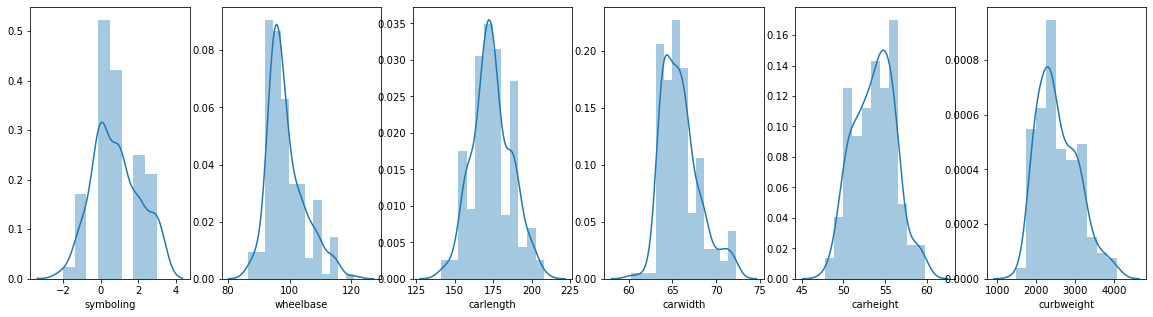

In [85]:
# visualising with distplots

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(20,5))

sns.distplot(df['symboling'], ax=ax1)
sns.distplot(df['wheelbase'], ax=ax2)
sns.distplot(df['carlength'], ax=ax3)
sns.distplot(df['carwidth'], ax=ax4)
sns.distplot(df['carheight'], ax=ax5)
sns.distplot(df['curbweight'], ax=ax6)
plt.show()

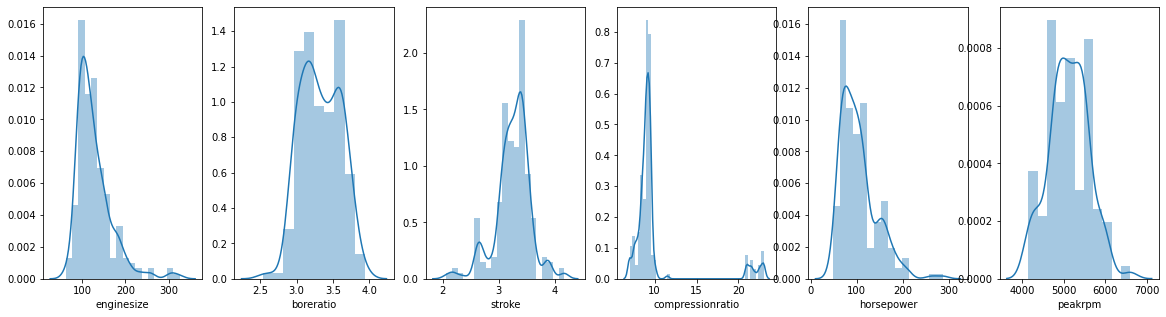

In [86]:
# visualising with distplots

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(20,5))

sns.distplot(df['enginesize'], ax=ax1)
sns.distplot(df['boreratio'], ax=ax2)
sns.distplot(df['stroke'], ax=ax3)
sns.distplot(df['compressionratio'], ax=ax4)
sns.distplot(df['horsepower'], ax=ax5)
sns.distplot(df['peakrpm'], ax=ax6)
plt.show()

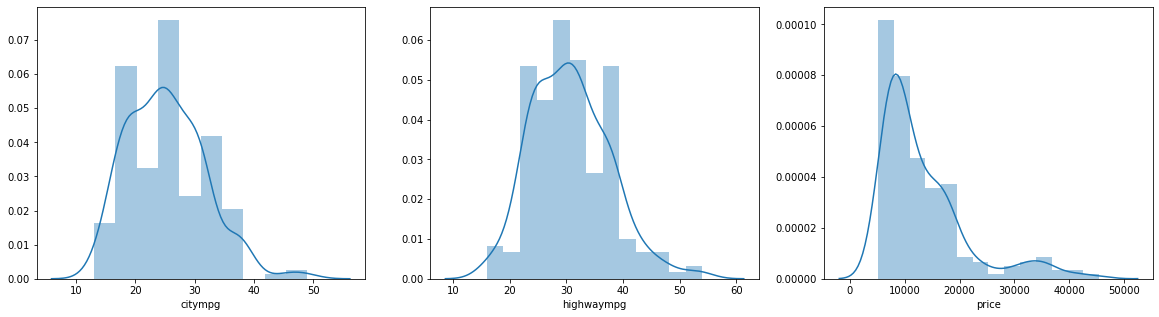

In [87]:
# visualising with distplots

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))

sns.distplot(df['citympg'], ax=ax1)
sns.distplot(df['highwaympg'], ax=ax2)
sns.distplot(df['price'], ax=ax3)
plt.show()

### Inference from numerical features
- compressionratio seems to have some outliers on the higher end, which might distort the model
- enginesize, horsepower and citympg might also be having some outliers that might distort the model
- will have to treat these outliers before building the model

In [88]:
df_cr_outli=df1.loc[df1['compressionratio']>12]
df_cr_outli.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.100000,104.390000,182.010000,67.430000,55.835000,2898.800000,135.700000,3.374500,3.485500,22.005000,84.450000,4435.000000,30.300000,34.750000,15838.150000
std,0.967906,6.869452,11.465596,2.251339,1.641333,585.386026,32.115089,0.285334,0.109134,0.802939,25.958418,239.571987,6.610199,8.626001,7759.843713
min,-1.000000,94.500000,165.300000,63.800000,52.800000,2017.000000,97.000000,2.990000,3.350000,21.000000,52.000000,4150.000000,22.000000,25.000000,7099.000000
25%,-0.250000,97.300000,171.700000,65.500000,54.900000,2308.000000,108.250000,3.010000,3.400000,21.375000,62.000000,4187.500000,25.000000,25.000000,9120.000000
50%,0.000000,105.800000,183.450000,67.650000,55.700000,2948.500000,139.500000,3.410000,3.495000,21.950000,84.000000,4425.000000,29.000000,33.000000,13852.500000
75%,0.000000,109.325000,189.325000,68.525000,56.700000,3443.750000,152.000000,3.610000,3.550000,22.775000,97.750000,4537.500000,36.250000,42.000000,19375.500000
max,2.000000,115.600000,202.600000,71.700000,58.700000,3770.000000,183.000000,3.700000,3.640000,23.000000,123.000000,4800.000000,45.000000,50.000000,31600.000000


In [89]:
# dropping these 20 rows of outlier compressionratio, before we build the model

df2=df1.loc[df1['compressionratio']<12]
df2   # we now have 185 rows after removing the outlier rows from compressionratio 

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [90]:
# we now look at the categorical features

df2.describe(include='object')

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,185,185,185,185,185,185,185,185,185
unique,1,2,2,5,3,2,7,7,7
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,161,98,81,111,182,133,144,94


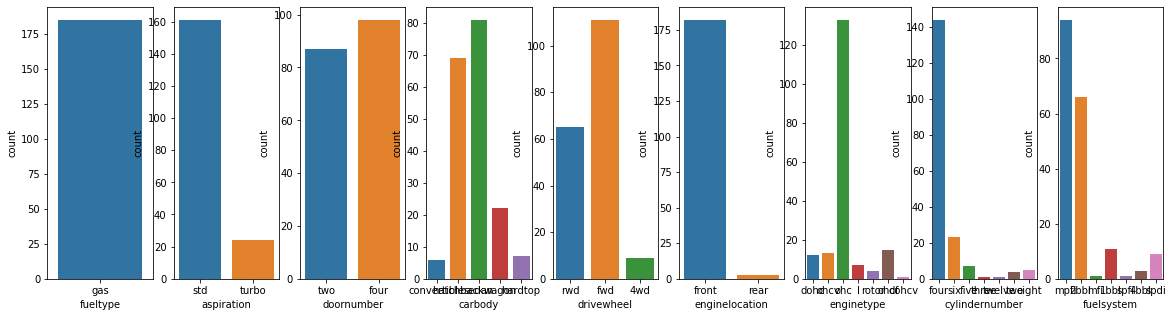

In [91]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(1,9, figsize=(20,5))

sns.countplot(df2['fueltype'], ax=ax1)
sns.countplot(df2['aspiration'], ax=ax2)
sns.countplot(df2['doornumber'], ax=ax3)
sns.countplot(df2['carbody'], ax=ax4)
sns.countplot(df2['drivewheel'], ax=ax5)
sns.countplot(df2['enginelocation'], ax=ax6)
sns.countplot(df2['enginetype'], ax=ax7)
sns.countplot(df2['cylindernumber'], ax=ax8)
sns.countplot(df2['fuelsystem'], ax=ax9)
plt.show()

### Inference from categorical features
- fueltype, aspiration, enginelocation have low variance; we can drop these features from the model
- enginetype and cylindernumber also suffer from low variance; let us also drop these features in the model for the timebeing

In [92]:
df3=df2.drop(['fueltype','aspiration','enginelocation','enginetype','cylindernumber'], axis=1)

In [93]:
df3

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,four,wagon,rwd,104.3,188.8,67.2,57.5,3157,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,four,sedan,rwd,109.1,188.8,68.9,55.5,2952,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


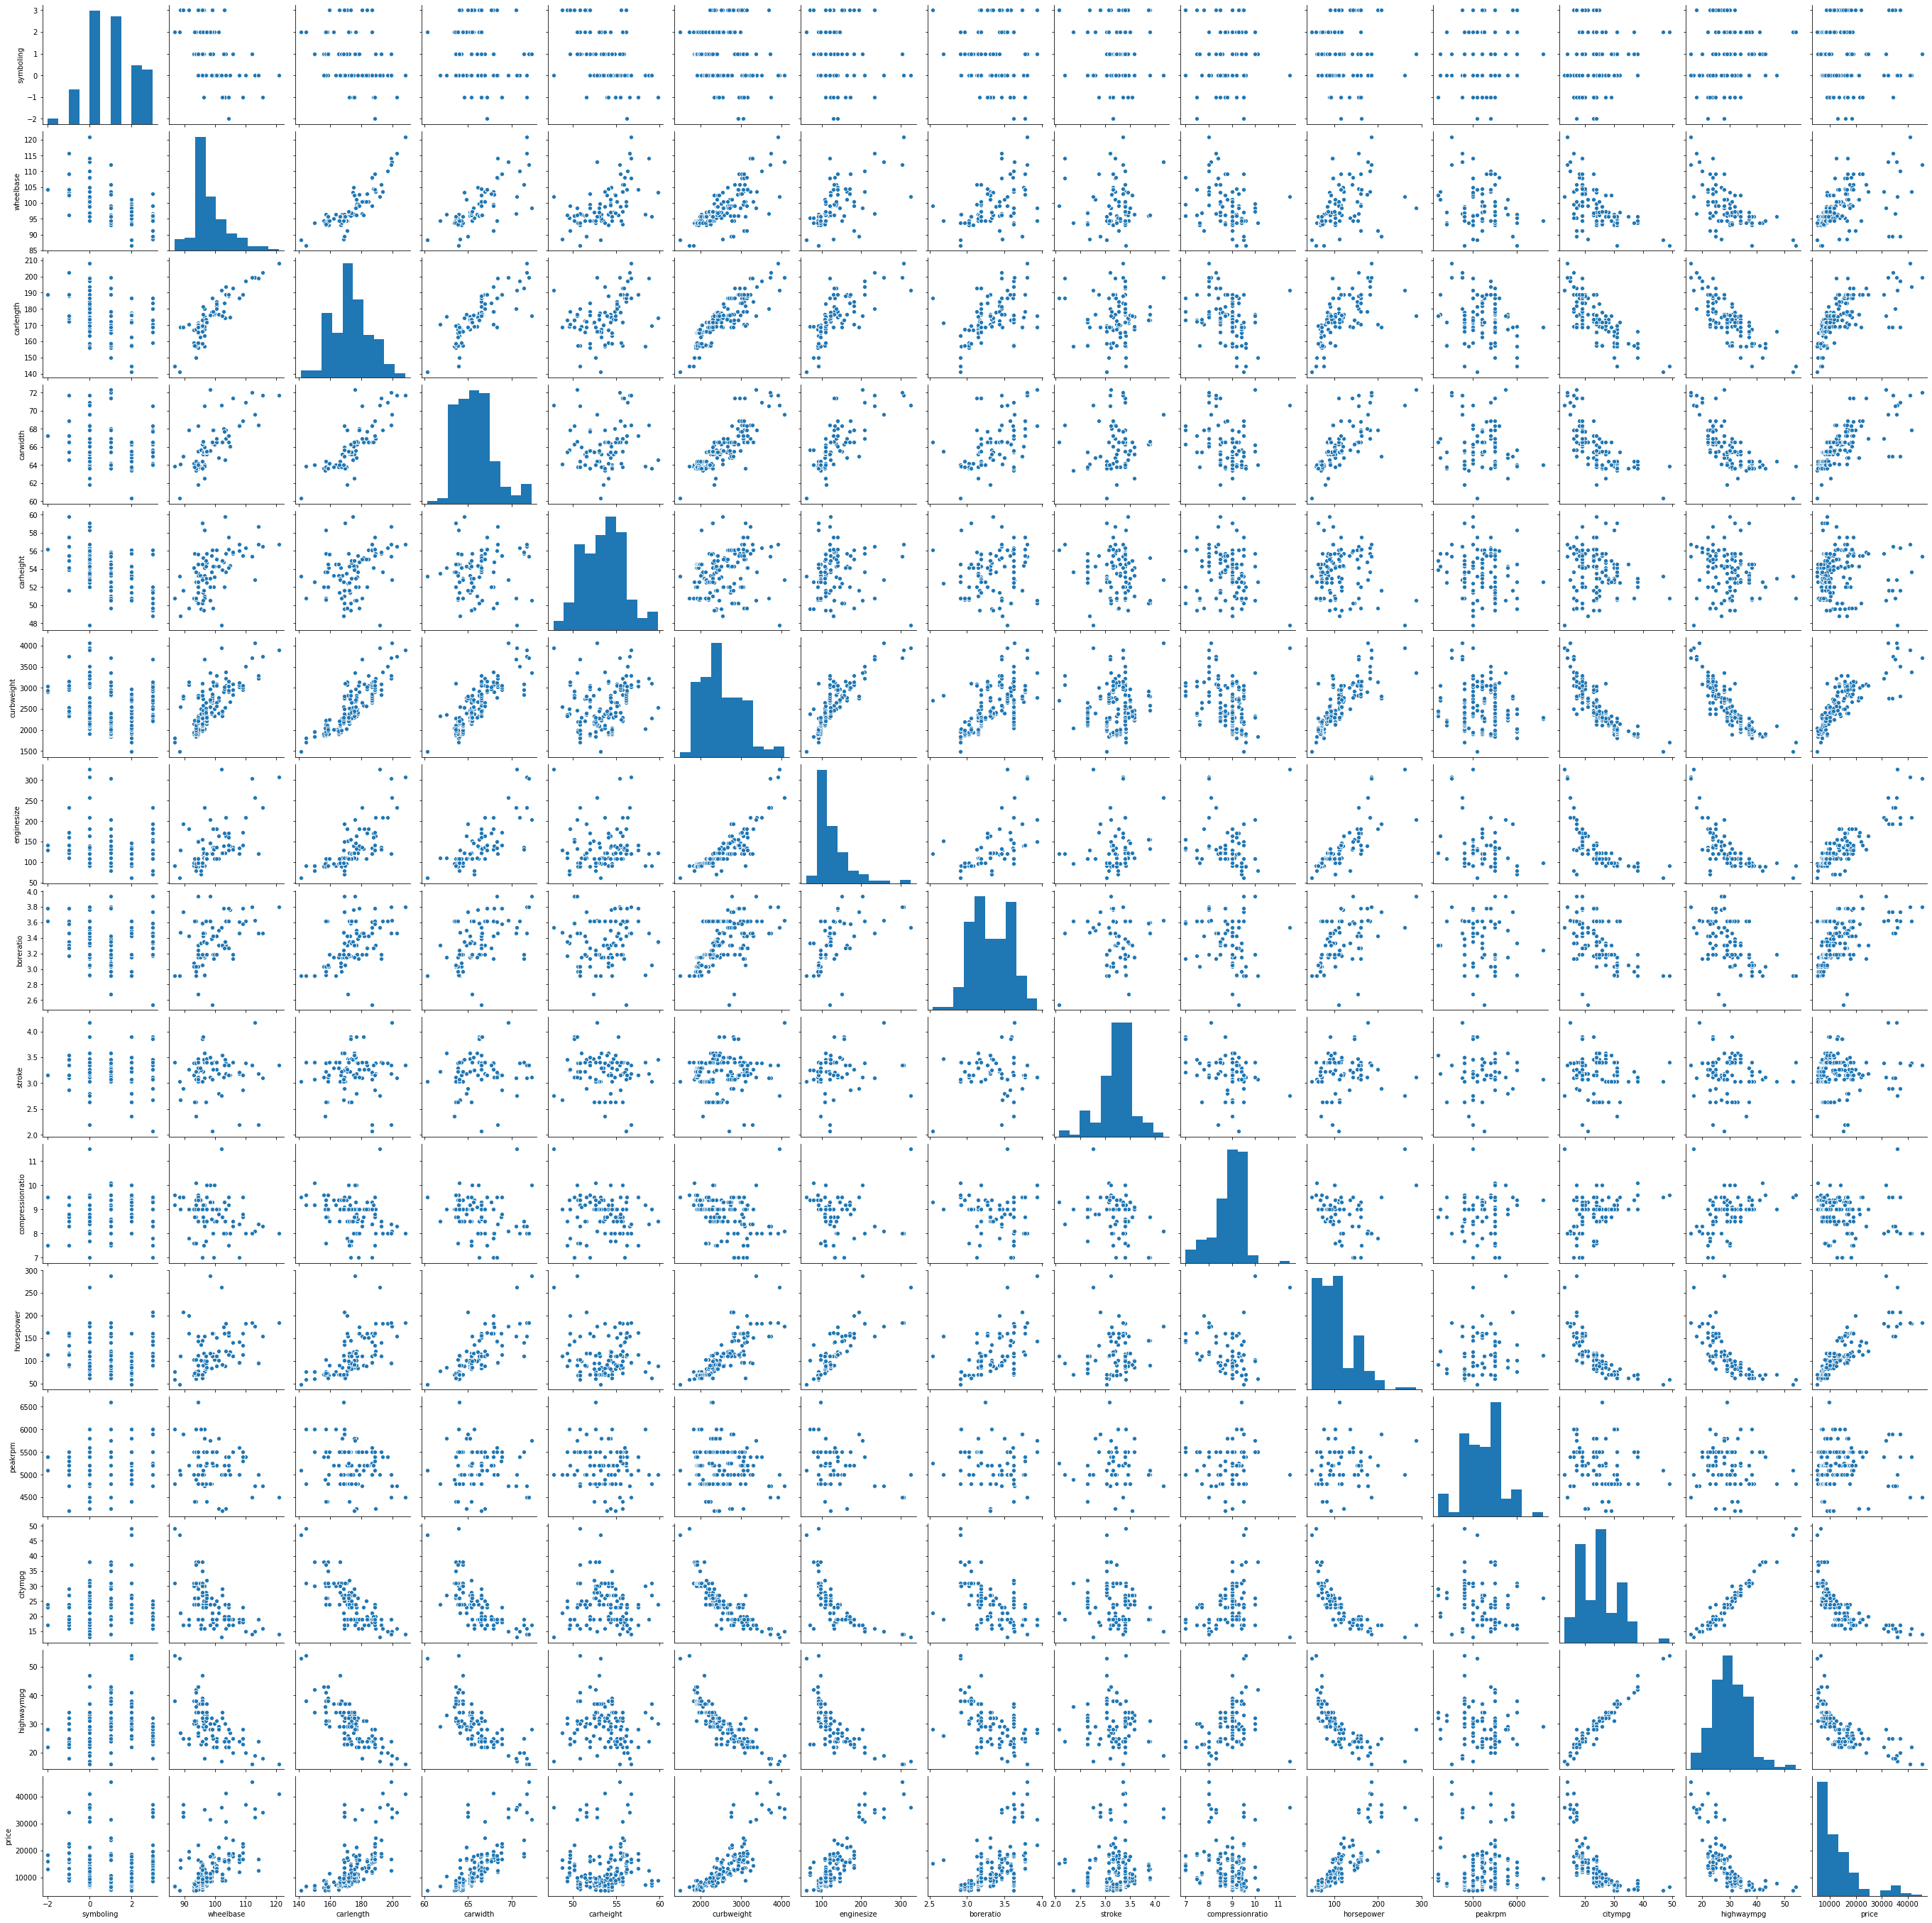

In [94]:
# we now are left with 19 columns, 18 independent and 1 target feature

# let us check the pairplots for numerical variables
sns.pairplot(df3)
plt.show()

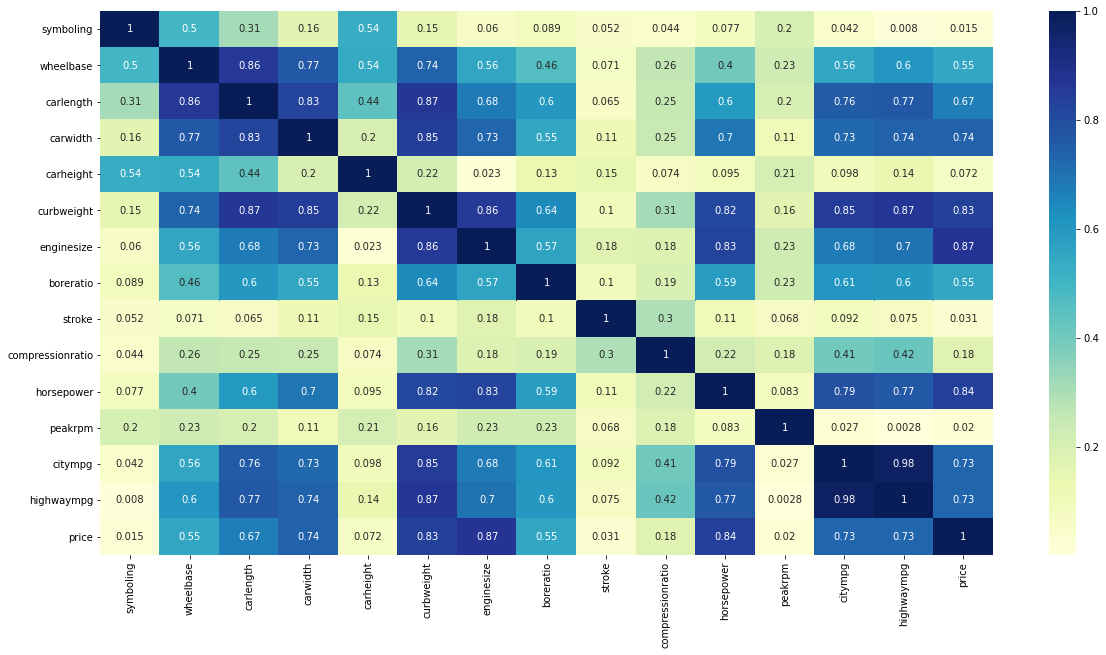

In [95]:
# checking collinarity of numerical variables through heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr().abs(), annot=True, cmap='YlGnBu')
plt.show()

### There are independent features that have high correlation
- carlength, carwidth, carweight, wheelbase, enginesize, horsepower, citympg, highwaympg are correlated with each other
- Together, they influence price 

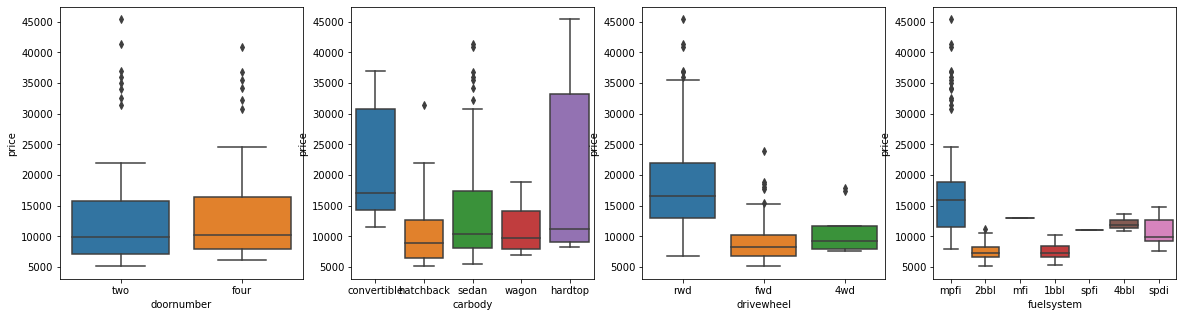

In [96]:
# will check the boxplots of categorical features

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,5))

sns.boxplot(x='doornumber', y='price', data=df3, ax=ax1)
sns.boxplot(x='carbody', y='price', data=df3, ax=ax2)
sns.boxplot(x='drivewheel', y='price', data=df3, ax=ax3)
sns.boxplot(x='fuelsystem', y='price', data=df3, ax=ax4)
plt.show()

### Inference
- doornumber doesnt seem to influence price
- carbody does influence price somewhat, with convertible carbody priced higher
- drivewheel does influence price somewhat with rwd priced higher
- fuelsystem seems to have a higher influence on price

## Data Preparation

In [97]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         185 non-null    int64  
 1   doornumber        185 non-null    object 
 2   carbody           185 non-null    object 
 3   drivewheel        185 non-null    object 
 4   wheelbase         185 non-null    float64
 5   carlength         185 non-null    float64
 6   carwidth          185 non-null    float64
 7   carheight         185 non-null    float64
 8   curbweight        185 non-null    int64  
 9   enginesize        185 non-null    int64  
 10  fuelsystem        185 non-null    object 
 11  boreratio         185 non-null    float64
 12  stroke            185 non-null    float64
 13  compressionratio  185 non-null    float64
 14  horsepower        185 non-null    int64  
 15  peakrpm           185 non-null    int64  
 16  citympg           185 non-null    int64  
 1

In [98]:
# converting doornumber into numericals
# there are two unique values in doornumber
# let two=0, four=1

df3['doornumber']=df3['doornumber'].map({'four': 1, 'two': 0})

df3.head()

,symboling,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,hatchback,rwd,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,sedan,fwd,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,sedan,4wd,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [99]:
# converting carbody into numericals
# there are five unique values in carbody
# will have to use one hot coding in this case

df_carbody=pd.get_dummies(df3['carbody'])

df_carbody.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [100]:
# converting drivewheel into numericals
# there are three unique values in drivewheel
# will have to use one hot coding in this case

df_drivewheel=pd.get_dummies(df3['drivewheel'])

df_drivewheel.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [101]:
# converting fuelsystem into numericals
# there are seven unique values in fuelsystem
# will have to use one hot coding in this case

df_fuelsystem=pd.get_dummies(df3['fuelsystem'])

df_fuelsystem.head()

,1bbl,2bbl,4bbl,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [102]:
# will concatenate these three datasets with df3

df3=pd.concat([df3, df_carbody], axis=1)

In [103]:
df3=pd.concat([df3, df_drivewheel], axis=1)

In [104]:
df3=pd.concat([df3, df_fuelsystem], axis=1)

In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 204
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         185 non-null    int64  
 1   doornumber        185 non-null    int64  
 2   carbody           185 non-null    object 
 3   drivewheel        185 non-null    object 
 4   wheelbase         185 non-null    float64
 5   carlength         185 non-null    float64
 6   carwidth          185 non-null    float64
 7   carheight         185 non-null    float64
 8   curbweight        185 non-null    int64  
 9   enginesize        185 non-null    int64  
 10  fuelsystem        185 non-null    object 
 11  boreratio         185 non-null    float64
 12  stroke            185 non-null    float64
 13  compressionratio  185 non-null    float64
 14  horsepower        185 non-null    int64  
 15  peakrpm           185 non-null    int64  
 16  citympg           185 non-null    int64  
 1

In [106]:
# we can now drop the object columns in the dataset

df3.drop(['carbody', 'drivewheel', 'fuelsystem'], axis=1, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 204
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         185 non-null    int64  
 1   doornumber        185 non-null    int64  
 2   wheelbase         185 non-null    float64
 3   carlength         185 non-null    float64
 4   carwidth          185 non-null    float64
 5   carheight         185 non-null    float64
 6   curbweight        185 non-null    int64  
 7   enginesize        185 non-null    int64  
 8   boreratio         185 non-null    float64
 9   stroke            185 non-null    float64
 10  compressionratio  185 non-null    float64
 11  horsepower        185 non-null    int64  
 12  peakrpm           185 non-null    int64  
 13  citympg           185 non-null    int64  
 14  highwaympg        185 non-null    int64  
 15  price             185 non-null    float64
 16  convertible       185 non-null    uint8  
 1

In [107]:
# Let us check if any of the columns have any other values other than numeric
# we use np.isreal function for this

df3[~df3.applymap(np.isreal).all(1)]

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,4wd,fwd,rwd,1bbl,2bbl,4bbl,mfi,mpfi,spdi,spfi


### So, there are now 30 columns, all numericals
- 29 columns containing independent features
- 1 target feature in price

## Splitting data into Target and Independent variables

In [108]:
X=df3.drop('price', axis=1)
Y=df3['price']

In [109]:
# Split data into training and test part
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=0)

## Building a Linear Model

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model1=LinearRegression()  # initializing an object

In [116]:
model1.fit(train_x,train_y)

LinearRegression()

In [117]:
print("Intercept of model1: ", model1.intercept_)

Intercept of model1:  -47572.358232910185


In [122]:
# printing the coefficients

print("Co-efficients of model1: ", model1.coef_)

Co-efficients of model1:  [ 4.05515981e+02  3.13611038e+02  1.42931578e+02  1.68950817e-01
  2.47964582e+02  4.11592793e+02 -1.70500022e+00  1.46144288e+02
 -2.39548187e+03 -2.27532983e+03 -1.45028072e+03  3.42726286e+01
  3.03998566e+00 -4.08711891e+02  4.60810667e+02  2.68517894e+03
  1.91325061e+02 -6.76783416e+02 -1.38593948e+02 -2.06112664e+03
  6.43886707e+02 -1.71661970e+03  1.07273299e+03 -8.91270458e+02
 -4.34553340e+02  6.74877773e+03 -2.94485402e+03 -8.30382250e+02
 -2.32715386e+03  6.79436197e+02]


## Testing the model

In [123]:
y_predict=model1.predict(test_x)

In [124]:
model1.score(train_x, train_y)  # accuracy on train dataset

0.9014267336946102

In [125]:
model1.score(test_x, test_y)   # accuracy on test dataset

0.7891153611114304

In [126]:
from sklearn.metrics import mean_squared_error
print("\n Mean squared error =:", mean_squared_error(y_predict,test_y))


 Mean squared error =: 9735411.207307654


In [127]:
from sklearn.metrics import r2_score
print("\n R2 or Coefficient of Determination =:", r2_score(y_predict,test_y))


 R2 or Coefficient of Determination =: 0.7718898578041884


In [130]:
# checking VIF scores for all the parameters

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


# the below table shows the colinearity of each feature with all other features

C:\Users\1966\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
15,convertible,inf
16,hardtop,inf
28,spdi,inf
27,mpfi,inf
26,mfi,inf
25,4bbl,inf
24,2bbl,inf
23,1bbl,inf
22,rwd,inf
21,fwd,inf


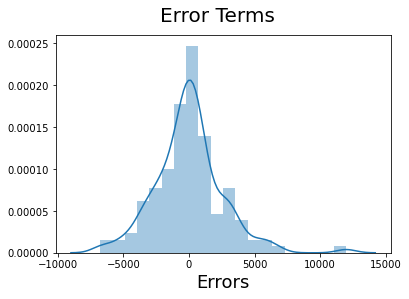

In [129]:
# Residual Analysis

# Prediction on the training data
# Recall the error residuals are calculated on training data
# here also we just use model.predict(Dataframe)
y_train_price=model1.predict(train_x)

# residual analysis is done on the training data

# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((train_y - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### We have built the first model
### We can attempt to improve this model in subsequent iterations